6.5 Machine Learning Part 2 : Clustering

### This script contains the following:

#### 1. Importing libraries and data
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Achievement6'

# import the dataset 
df = pd.read_csv(os.path.join(path,'Project', 'Data', 'Prepared Data', 'Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'), index_col= False)

### 2. The elbow technique

In [4]:
#subsetting the dataset which contains only numerical columns
df_sub = df[['COVID-19 Deaths' , 'Number of Mentions']]
df_sub

,COVID-19 Deaths,Number of Mentions
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
430555,7.0,9.0
430556,7.0,3.0
430557,0.0,0.0
430558,7.0,6.0


In [5]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [6]:
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2656920707.0264297,
 -1269366260.6701894,
 -720728460.5175083,
 -462532073.6810461,
 -322277677.40348375,
 -229866340.9655868,
 -177326670.72896487,
 -138414305.27475518,
 -117487667.75213197]

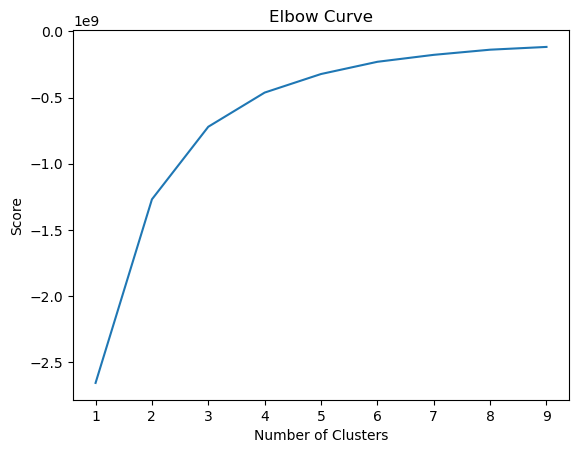

In [7]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### From the above chart it is clear that the breaking point of the curve or elbow is at cluster number 4. From there onwards we can see that the curve begins to flatten out. So the optimal count of clusters that I am going to use in the K-meams algorithm is 4.

### 3. k-means clustering

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [9]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

KMeans(n_clusters=4)

In [10]:
#create a new column named clusters so that we can see each observation belongs to which cluster
df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_14572\3166813023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [11]:
print(df_sub.head())
df_sub['clusters'].value_counts()

   COVID-19 Deaths  Number of Mentions  clusters
0              0.0                 0.0         0
1              0.0                 0.0         0
2              0.0                 0.0         0
3              0.0                 0.0         0
4              0.0                 0.0         0


clusters
0    419394
3      9833
1      1203
2       130
Name: count, dtype: int64

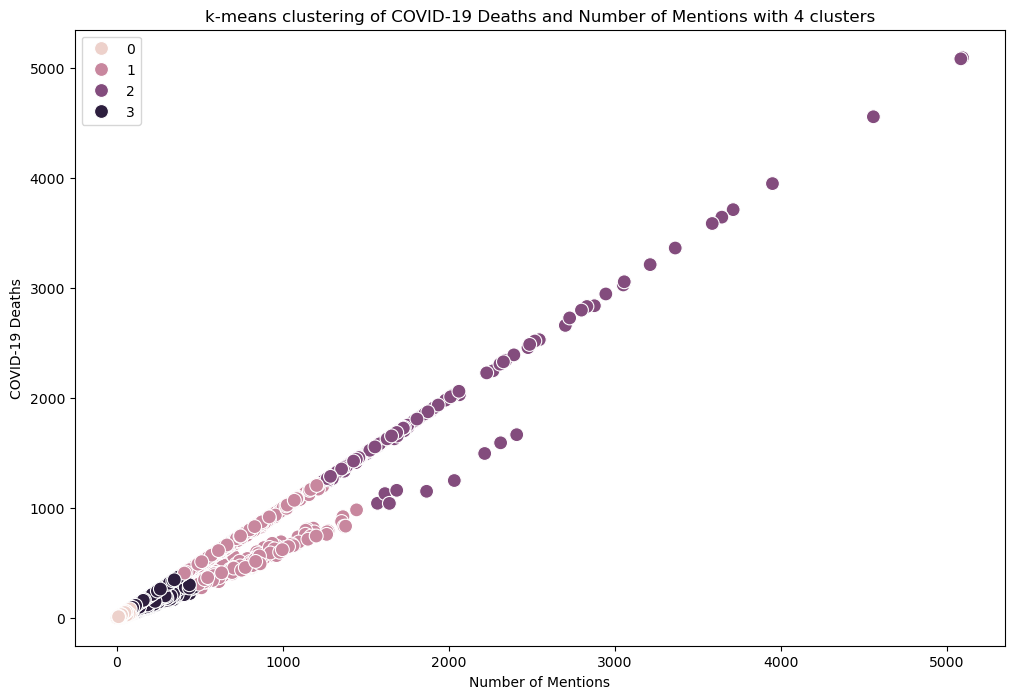

In [12]:
# Plot the clusters for the "Number of Mentions" and "COVID-19 Deaths" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['Number of Mentions'], y=df_sub['COVID-19 Deaths'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Mentions') # Label x-axis.
plt.ylabel('COVID-19 Deaths') # Label y-axis.
plt.title('k-means clustering of COVID-19 Deaths and Number of Mentions with 4 clusters')
plt.show()

#### From the above scatterplot we can infer that:
#### Cluster 0 : Highlights mininal impact of COVID-19 Deaths as Number of mentions of conditions are also less.
#### Cluster 2 : Represents moderate impact of  COVID-19 Deaths and Mentions.
#### Cluster 1 : Represents high impact of COVID-19 Deaths and Mentions.
#### Cluster 3 : Represents very high impacts of COVID-19 Deaths and Mentions.

In [15]:
# Export the "df_covid_final_cleaned" dataframe to CSV
df_sub.to_csv(os.path.join(path, 'Project','Data','Prepared Data', 'COVID-19_Cluster.csv'), index=False)

In [14]:
# classify clusters based on their color
df_sub.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df_sub.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df_sub.loc[df['clusters'] == 1, 'cluster'] = 'light purple'
df_sub.loc[df['clusters'] == 0, 'cluster'] = 'pink'

KeyError: 'clusters'

In [ ]:
# calculate deacriptive statistics
df_sub.groupby('cluster').agg({'COVID-19 Deaths' : ['mean', 'median'],
                               'Number of Mentions' : ['mean', 'median']
                              })

#### Here the mean and median values are progressively increasing as we move from Cluster 0 to Cluster 3. This shows that each cluster has its own level of impact of COVID-19 Deaths and Number of Mentions.

#### How to use the results of clustering algorithm for future steps of analytical pipeline:
#### - The results help us to separate a particular cluster from other clusters and do a detailed analysis on this cluster to glean more actionable insights.
#### - Visualizations and reports based on clusters can enhance the communication of insights which supports better 
  

In [ ]:
# saving the dataframe
# Export the "df_covid_final_cleaned" dataframe to CSV
df_sub.to_csv(os.path.join(path, 'Project','Data','Prepared Data', 'COVID-19_Cluster.csv'), index=False)